In [ ]:
'''Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.'''

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
data = boston["data"]
feature_names = boston["feature_names"]
target = boston["target"]
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
'''Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.'''

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [6]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, learning_rate = 250, random_state = 42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_scaled.shape

(404, 13)

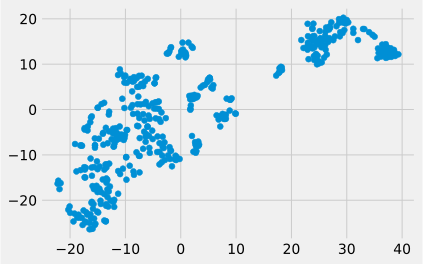

In [7]:
plt.style.use('fivethirtyeight')
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])

In [ ]:
'''Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.'''

In [8]:
from sklearn.cluster import KMeans

In [9]:
kmeans = KMeans(n_clusters=3, max_iter = 100, random_state = 42)
labels_train = kmeans.fit_predict(X_train_scaled)

In [10]:
pd.value_counts(labels_train)

0    191
1    127
2     86
dtype: int64

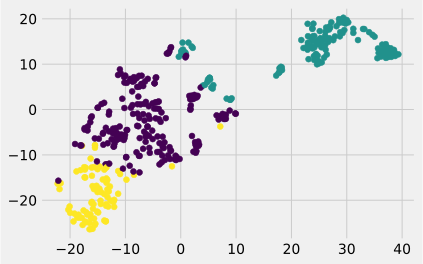

In [11]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = labels_train)

In [12]:
print(f'Средние значения price Кластер 0: {y_train[labels_train==0].mean()}')
print(f'Средние значения price Кластер 1: {y_train[labels_train==1].mean()}')
print(f'Средние значения price Кластер 2: {y_train[labels_train==2].mean()}')
print('-'*30)

Средние значения price Кластер 0: price    24.958115
dtype: float64
Средние значения price Кластер 1: price    16.165354
dtype: float64
Средние значения price Кластер 2: price    27.788372
dtype: float64
------------------------------


In [13]:
print('Средние значения CRIM Кластер 0:', X_train.loc[labels_train==0, 'CRIM'].mean())
print('Средние значения CRIM Кластер 0:', X_train.loc[labels_train==1, 'CRIM'].mean())
print('Средние значения CRIM Кластер 0:', X_train.loc[labels_train==2, 'CRIM'].mean())

Средние значения CRIM Кластер 0: 0.42166020942408367
Средние значения CRIM Кластер 0: 10.797028425196853
Средние значения CRIM Кластер 0: 0.07356558139534886


In [ ]:
'''* Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.'''

In [14]:
X_test_scaled = scaler.fit_transform(X_test) # вот и не знаю сюда надо фит трансформ или можно ограничиться предыдущим расчетом
# где просто трансформ
X_test_tsne = tsne.fit_transform(X_test_scaled)
X_test_scaled.shape

(102, 13)

In [15]:
labels_test = kmeans.fit_predict(X_test_scaled)
pd.value_counts(labels_test)


1    50
0    38
2    14
dtype: int64

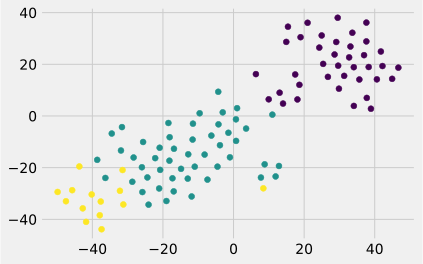

In [16]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c = labels_test)

In [17]:
print('Средние значения price Кластер 0:', y_test[labels_test==0].mean())
print('Средние значения price Кластер 1:', y_test[labels_test==1].mean())
print('Средние значения price Кластер 2:', y_test[labels_test==2].mean())
print('-'*30)
print('Средние значения CRIM Кластер 0:', X_test.loc[labels_test==0, 'CRIM'].mean())
print('Средние значения CRIM Кластер 0:', X_test.loc[labels_test==1, 'CRIM'].mean())
print('Средние значения CRIM Кластер 0:', X_test.loc[labels_test==2, 'CRIM'].mean())

Средние значения price Кластер 0: price    16.710526
dtype: float64
Средние значения price Кластер 1: price    21.652
dtype: float64
Средние значения price Кластер 2: price    33.871429
dtype: float64
------------------------------
Средние значения CRIM Кластер 0: 9.419181842105264
Средние значения CRIM Кластер 0: 0.2244212
Средние значения CRIM Кластер 0: 0.08618571428571427


In [18]:
X_test_scaled = scaler.transform(X_test) # вот и не знаю сюда надо фит трансформ или можно ограничиться предыдущим расчетом
# где просто трансформ
X_test_tsne = tsne.fit_transform(X_test_scaled)
X_test_scaled.shape

(102, 13)

In [19]:
labels_test = kmeans.fit_predict(X_test_scaled)
pd.value_counts(labels_test)

1    50
0    38
2    14
dtype: int64

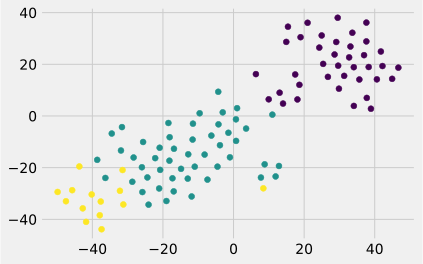

In [20]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c = labels_test)